<a href="https://colab.research.google.com/github/krish-crozz/AI---Disease/blob/main/AI_Disease_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample heart disease dataset (hardcoded)
data = {
    'age': [63, 37, 41, 56, 57],
    'sex': [1, 1, 0, 1, 0],
    'cp': [3, 2, 1, 1, 0],
    'trestbps': [145, 130, 130, 120, 120],
    'chol': [233, 250, 204, 236, 354],
    'fbs': [1, 0, 0, 0, 0],
    'restecg': [0, 1, 0, 1, 1],
    'thalach': [150, 187, 172, 178, 163],
    'exang': [0, 0, 0, 0, 1],
    'oldpeak': [2.3, 3.5, 1.4, 0.8, 0.6],
    'slope': [0, 0, 2, 2, 2],
    'ca': [0, 0, 0, 0, 0],
    'thal': [1, 2, 2, 2, 2],
    'target': [1, 1, 1, 1, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display first few rows
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       0  


In [46]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [48]:

df.fillna(df.mean(), inplace=True)


In [20]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

df = df.drop_duplicates()


Duplicate rows: 0


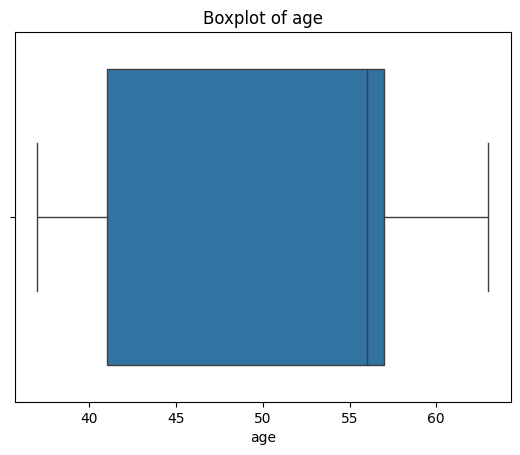

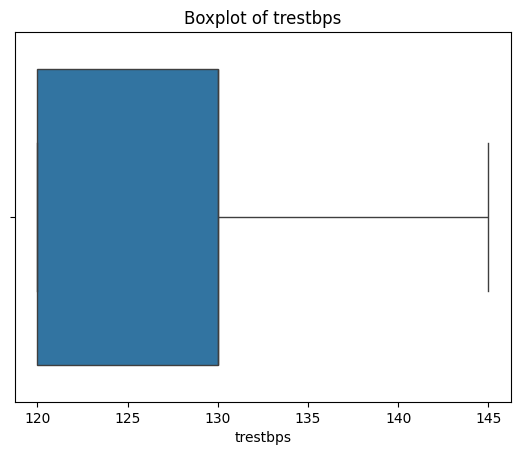

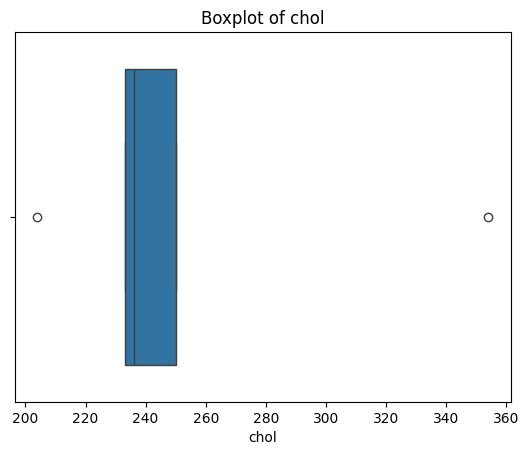

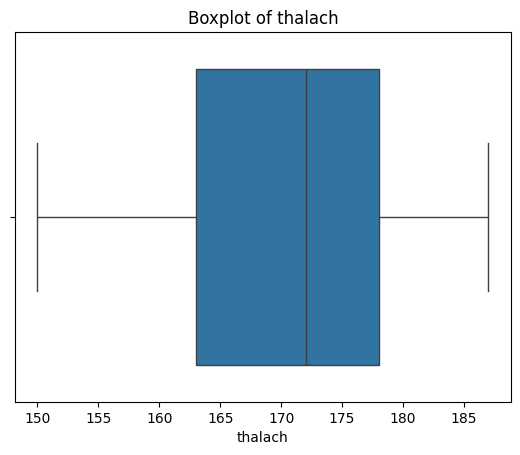

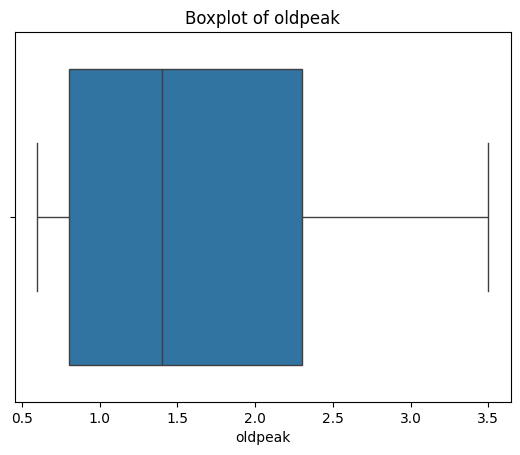

In [21]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


In [40]:

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) |
          (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [41]:
df.dtypes

df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')


In [28]:
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)


In [49]:
df_encoded

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_2,cp_3,thal_2,slope_2
0,1.001380,1,1.297771,-0.899843,1,0,-1.375219,0,0.090536,0,1,False,True,False,False
1,-1.365519,1,-0.162221,1.394756,0,1,0.973232,0,1.176965,0,1,True,False,True,False
3,0.364138,1,-1.135550,-0.494913,0,1,0.401987,0,-1.267500,0,1,False,False,True,True


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_encoded[scaled_features] = scaler.fit_transform(df_encoded[scaled_features])
